# Check Point 

# Nome: Lucas Sabonaro Gonzalez 
# Rm: 95518
# Turma: 2TDSA

## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [236]:
df = pd.read_csv('aptos.csv',  sep=',')
df.head(150)





,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,Centro
110,56,247.0,2,1,0.0,Planalto
111,126,736.0,3,3,0.0,Iraja
112,96,560.0,3,1,0.0,Centro


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: Tamanho do apartamento
-   Valor: Preço do apartamento
-   Quarto: Quantidade de quartos que possui o apartamento 
-   Vagas: Vagas que cada apartamento possui
-   Reformado: Dizer se o apartamento está reformado ou não

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Acredito que o preço do apartamento varia conforme o bairro. 
2.  Acredito que o valor do apartamento varia conforme a metragem indicada, pois, quanto maior o apartamento, mais caro ele pode ser.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [237]:
df_1 = pd.get_dummies(df, columns=['bairro'])

Nessa etapa, o get_dummies, separou os bairros em colunas, além de, converter para valor numérico, quando, um apartamento está ou não localizado naquele bairro, então 0 é para quando não está e, 1 ele está.

In [238]:
df_1.head(150)

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,555.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

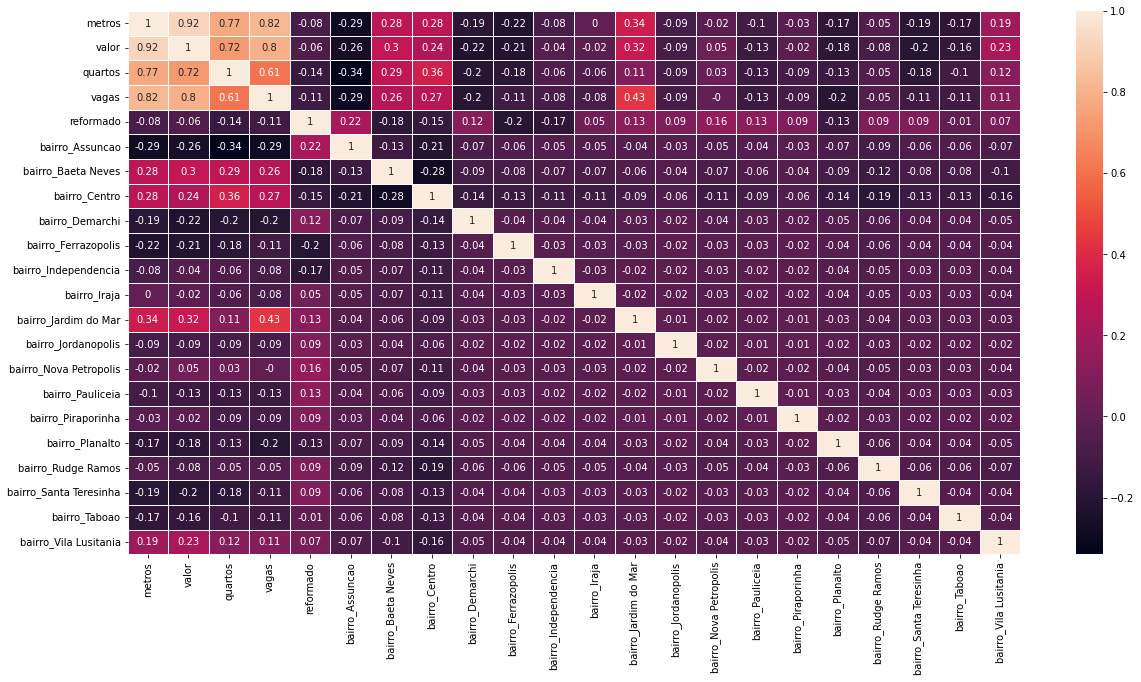

In [239]:
import seaborn as sns
correlation_matrix = df_1.corr().round(2)   
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)





Conforme a primeira afirmação feita, podemos observar que, grande parte dos dados não são condizentes com o que se imaginava. Sendo assim, o gráfico acima nos auxilia a identificar esses pontos, uma vez que, para haver coorelação com o que foi dito, o ideal é que o número sempre esteja próximo de um. Portanto, é possivel chegar à uma conclusão após fazer a análise do gráfico, na qual, à afirmação, não é verdadeira.
 

<AxesSubplot:>

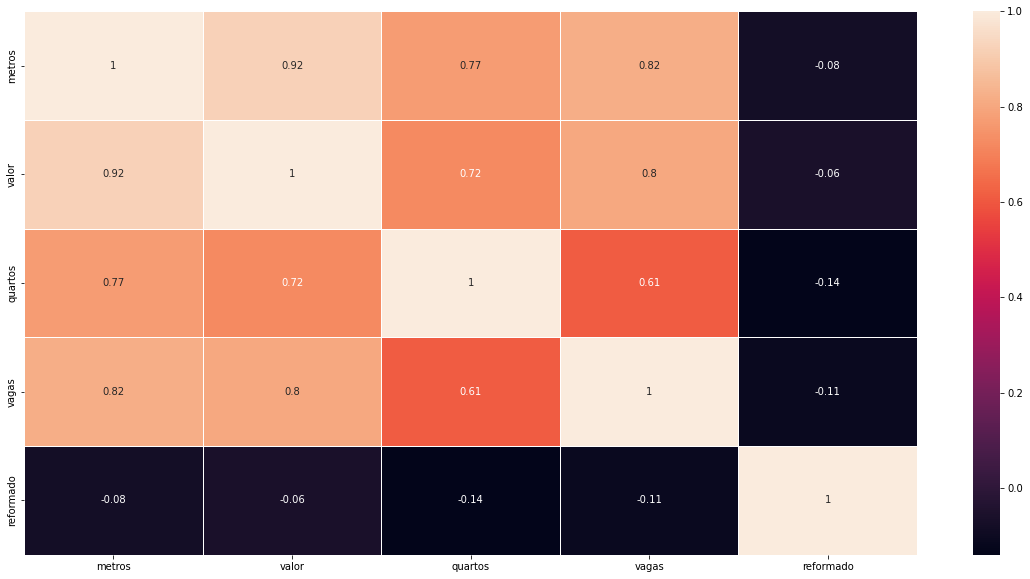

In [240]:
import seaborn as sns
correlation_matrix = df.corr().round(2)   
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)





Agora, vamos partir para a segunda informação, na qual foi dito que, o preço do apartamento varia conforme a metragem. A partir do gráfico acima, é possível analisar que, existe uma coorelação com o que foi imaginado de, 92%. Portanto, diferente da priemira afirmação, a segunda é mais verídica.

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

In [241]:
df_2 = df_1.dropna()
df_2.isnull().sum()

metros                    0
valor                     0
quartos                   0
vagas                     0
reformado                 0
bairro_Assuncao           0
bairro_Baeta Neves        0
bairro_Centro             0
bairro_Demarchi           0
bairro_Ferrazopolis       0
bairro_Independencia      0
bairro_Iraja              0
bairro_Jardim do Mar      0
bairro_Jordanopolis       0
bairro_Nova Petropolis    0
bairro_Pauliceia          0
bairro_Piraporinha        0
bairro_Planalto           0
bairro_Rudge Ramos        0
bairro_Santa Teresinha    0
bairro_Taboao             0
bairro_Vila Lusitania     0
dtype: int64

Nessa etapa, foi feito um drop dos valores nulos, após isso, alocamos todos em uma tabela

Text(0.5, 1.0, 'vagas')

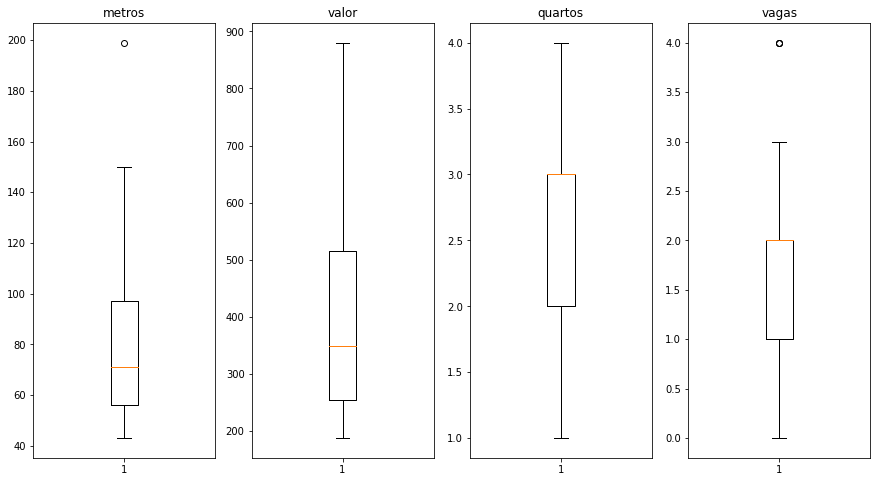

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(1, 4, figsize=(15,8))

ax1.boxplot(df_2['metros'])
ax1.set_title('metros')

ax2.boxplot(df_2['valor'])
ax2.set_title('valor')

ax3.boxplot(df_2['quartos'])
ax3.set_title('quartos')

ax4.boxplot(df_2['vagas'])
ax4.set_title('vagas')

Sim, foi localizado outliers. Para encontrá-los, utilizei o metódo de boxplot. Sendo assim, os dados foram mantidos no atributo metros pois, de 150 pra 200 não é um valor impossivel de ser imaginado, se tirassemos alguns desses dados, ele iria encurtar o tamanho do dataset, podendo prejudicar a analise de outliers e a precisão do machine learning. Já o atributo vagas optei também por mante-los, já que agora, a diferença de 3 para 4 é pequena.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear 
2. Árvore de decisão para regressão

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. A regressão linear é um modelo estatístico que assume uma relação linear entre a variável independente (ou variáveis) e a variável dependente. Em outras palavras, o modelo tenta encontrar a melhor linha reta que se ajusta aos dados. O modelo pode ser ajustado usando a biblioteca scikit-learn.

2. Árvores de decisão são modelos de aprendizado de máquina que dividem o conjunto de dados em pequenos subconjuntos usando uma série de regras. Para a regressão, o modelo tenta prever um valor contínuo (em vez de uma classe). O modelo pode ser ajustado usando a biblioteca scikit-learn

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

In [243]:
from sklearn.model_selection import train_test_split

X = df_2.drop(columns=['valor']) #coluna preditiva, removemos, para não entregar a resposta
y = df_2['valor'] #coluna alvo, a partir dela iremos fazer as previsões


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Test Size:20% dos valores vao pra teste, e os outros 80 vai ser pra treino. 

### Algoritmo 1

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#previsão
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred_test = regressor.predict(X_test)

y_pred_train = regressor.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Teste:", r2_test)

r2_train = r2_score(y_train, y_pred_train)
print("R2 Treino:", r2_train) #R2 : Uma metrica de acuracia para o metodo de regressao

R2 Teste: 0.7757267094478684
R2 Treino: 0.8816277607517635


### Algoritmo 2

In [245]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)

y_pred_test = tree_reg.predict(X_test)

y_pred_train = tree_reg.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Teste:", r2_test)

r2_train = r2_score(y_train, y_pred_train)
print("R2 Treino:", r2_train)

R2 Teste: 0.8296845071105504
R2 Treino: 0.9946947772075322


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | Regressão Linear | Árvore de Decisão |
|:---:|:---:|:---:|
| treino | 88% | 99.5% |
| teste  | 77.5% | 83% |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algoritimo que obteve o melhor resultado foi o da Árvore de decisão, porém, fazendo o exercício a baixo, foi possível notar que, os valores da árvore de decisão, em certo ponto, não conseguem alcançar valores mais robustos, ou seja, o algoritimo estagnou, está viciado. Então, é possível entender que, o algoritimo de regressão linear, por mais que obteve resultado inferior no exercicio acima, no exercio de baixo, o resultado acompanha conforme vamos fazendo adaptações nos valores mencionados. Portanto, por conta da explanação acima, acredito que nesse caso, o algoritimo de regressão linear seja mais apto a se utlizar nesse caso. 

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [246]:
final_apartamento = pd.DataFrame({'metros': [72], 'quartos': [2], 'vagas': [2], 'reformado': [1],
                              'bairro_Assuncao': [0], 'bairro_Baeta Neves': [0], 'bairro_Centro': [1],
                              'bairro_Demarchi': [0], 'bairro_Ferrazopolis': [0], 'bairro_Independencia': [0], 
                              'bairro_Iraja': [0], 'bairro_Jardim do Mar': [0],
                              'bairro_Jordanopolis': [0], 'bairro_Nova Petropolis': [0],	'bairro_Pauliceia': [0],
                              'bairro_Piraporinha': [0], 'bairro_Planalto': [0], 'bairro_Rudge Ramos': [0],
                              'bairro_Santa Teresinha': [0], 'bairro_Taboao': [0], 'bairro_Vila Lusitania': [0]})



In [247]:
valor_final = regressor.predict(final_apartamento)
print(f"Preço do apartamento com Regressão Linear: {valor_final[0]}")

valor_final = tree_reg.predict(final_apartamento)
print(f"Preço do apartamento com Árvore de Decisão: {valor_final[0]}")

Preço do apartamento com Regressão Linear: 392.0205408157386
Preço do apartamento com Árvore de Decisão: 341.3333333333333


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Em partes. Pois, o metódo de regressão linear por mais que seja o preferível, como já explicado acima, obteve valores que de certa forma, distorcem do metódo de árvore de decisão. Com isso, é possível utilizar-se de ambos os metodos para, poder perceber suas diferenças e similaridades e assim, compreender como cada um funciona dentro do nosso dataset.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Utilizar outras técnicas de machine learning, a fim de mitigar a disparidade entre os dois metódos utilizados e, consequentemente, poder alcançar um nível de confiabilidade maior para ambos os algoritimos que serão utilizados. 




